In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from IPython.display import display
from plotting import plot_matrix

# Stability theory of ODEs

## Stable, Asymptotically stable, unstable (1st order ODE)

In [2]:
t = sym.Symbol("t")
y = sym.Function("y")

ode_1 = sym.Eq(sym.diff(y(t), t)*sym.sin(t) - y(t)*sym.cos(t), 0)
ode_2 = sym.Eq(sym.diff(y(t), t) + y(t), 0)
ode_3 = sym.Eq(sym.diff(y(t), t) - y(t), 0)

display(ode_1, ode_2, ode_3)

Eq(-y(t)*cos(t) + sin(t)*Derivative(y(t), t), 0)

Eq(y(t) + Derivative(y(t), t), 0)

Eq(-y(t) + Derivative(y(t), t), 0)

In [3]:
sol_1 = sym.dsolve(ode_1, y(t)).rhs
sol_2 = sym.dsolve(ode_2, y(t)).rhs
sol_3 = sym.dsolve(ode_3, y(t)).rhs

display(sol_1, sol_2, sol_3)

C1*sin(t)

C1*exp(-t)

C1*exp(t)

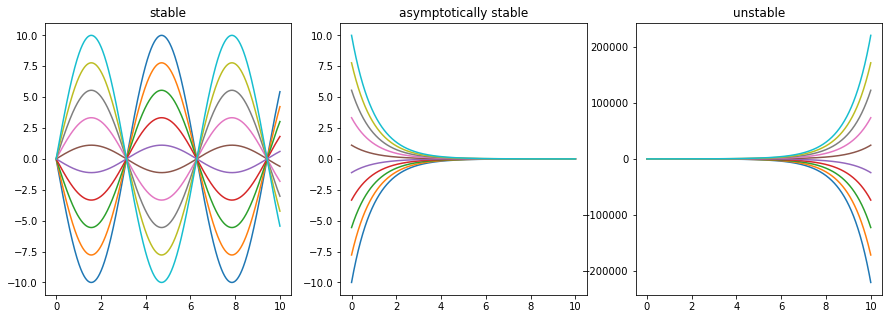

In [4]:
xpts = np.linspace(0,10,1000)
c_list = np.linspace(-10,10,10)  # variation of the free constant (boundary condition)

fig, ax = plt.subplots(1,3, figsize=(15,5))
for c in c_list:
    ax[0].plot(xpts, sym.lambdify(t, sol_1.subs("C1", c))(xpts))
    ax[1].plot(xpts, sym.lambdify(t, sol_2.subs("C1", c))(xpts))
    ax[2].plot(xpts, sym.lambdify(t, sol_3.subs("C1", c))(xpts))

ax[0].set_title("stable")
ax[1].set_title("asymptotically stable")
ax[2].set_title("unstable")

plt.show()

## Example: Evaluating stability by calculating eigenvalues (2nd order ODE)

In [5]:
# Parameter
m = sym.Symbol("m", positive=True, real=True)
k = sym.Symbol("k", real=True)
c = sym.Symbol("c", positive=True, real=True)

t = sym.Symbol("t")
y = sym.Function("y")

ode = sym.Eq(m*y(t).diff(t, t) + k*y(t).diff(t) + c*y(t), 0)

display(ode)

Eq(c*y(t) + k*Derivative(y(t), t) + m*Derivative(y(t), (t, 2)), 0)

In [6]:
x = sym.Matrix([y(t),
                y(t).diff(t)])
x_dot = sym.Matrix([x[1],
                    sym.solve(ode, y(t).diff(t, t))[0]])
display(x, x_dot)

Matrix([
[               y(t)],
[Derivative(y(t), t)]])

Matrix([
[                Derivative(y(t), t)],
[-(c*y(t) + k*Derivative(y(t), t))/m]])

In [7]:
A = [[x_dot[0].expand().coeff(x[0]), x_dot[0].expand().coeff(x[1])],
     [x_dot[1].expand().coeff(x[0]), x_dot[1].expand().coeff(x[1])]]
A = sym.Matrix(A)
A

Matrix([
[   0,    1],
[-c/m, -k/m]])

Calculate eigenvalues

In [18]:
lam = sym.symbols('lambda')
cp = sym.det(A - lam * sym.eye(2))
eigs = sym.roots(sym.Poly(cp, lam))
print(f"Multiplicity of eigenvalues: {list(eigs.values())}")
display(*[eig.simplify() for eig in eigs])

Multiplicity of eigenvalues: [1, 1]


-(k + sqrt(-4*c*m + k**2))/(2*m)

(-k + sqrt(-4*c*m + k**2))/(2*m)

Solve ODE (or construct via eigenvalues)

In [9]:
display(ode)

sol = sym.dsolve(ode, y(t))
display(sol)

Eq(c*y(t) + k*Derivative(y(t), t) + m*Derivative(y(t), (t, 2)), 0)

Eq(y(t), C1*exp(t*(-k - sqrt(-4*c*m + k**2))/(2*m)) + C2*exp(t*(-k + sqrt(-4*c*m + k**2))/(2*m)))

lambda_i = [0.1+0.99498744j 0.1-0.99498744j]
lambda_i = [0.+1.j 0.-1.j]
lambda_i = [-0.1+0.99498744j -0.1-0.99498744j]


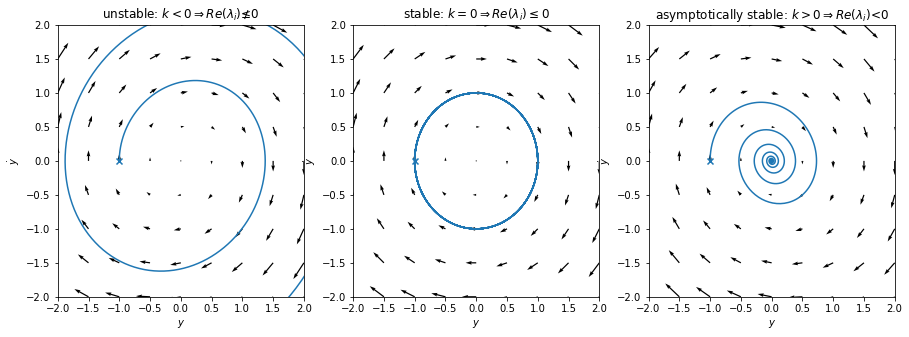

In [10]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

y_min = y_dot_min = -2
y_max = y_dot_max = 2

y_dot_grid, y_grid = np.mgrid[y_min-.5:y_max+.5:.5, y_dot_min-.5:y_dot_max+.5:.5]

ics = {y(0): -1,
       y(t).diff(t).subs(t, 0): 0}

for i, k_i in enumerate([-0.2, 0.0, 0.2]):
    # Quiver
    A_i = np.array(A.subs(m, 1).subs(c, 1).subs(k, k_i), dtype=float)  # m = 1, c = 1
    print(f"lambda_i = {np.linalg.eig(A_i)[0]}")

    u = A_i[0,:] @ np.array([y_grid.flatten(), y_dot_grid.flatten()])
    v = A_i[1,:] @ np.array([y_grid.flatten(), y_dot_grid.flatten()])

    ax[i].quiver(y_grid,y_dot_grid,u,v, width=0.005)
    ax[i].scatter(-1,0, marker="x")

    # Trace
    ode_i = ode.subs(m, 1).subs(c, 1).subs(k, k_i)  # m = 1, c = 1
    tpts = np.linspace(0,50,1000)
    y_trace_sol     = sym.dsolve(ode_i, y(t), ics=ics)
    y_trace         = sym.lambdify(t, y_trace_sol.rhs)
    y_dot_trace     = sym.lambdify(t, y_trace_sol.rhs.diff(t))
    ax[i].plot(y_trace(tpts), y_dot_trace(tpts))

    ax[i].set_xlim((y_min, y_max))
    ax[i].set_ylim((y_dot_min, y_dot_max))
    ax[i].set_xlabel("$y$")
    ax[i].set_ylabel("$\dot{y}$")

ax[0].set_title("unstable: $k < 0 \\Rightarrow Re(\lambda_i) \\nleq 0$")
ax[1].set_title("stable: $k = 0 \\Rightarrow Re(\lambda_i) \\leq 0$")
ax[2].set_title("asymptotically stable: $k > 0 \\Rightarrow Re(\lambda_i) \\less 0$")

plt.show()

## Steamplots and Eigenvalues of various matrices

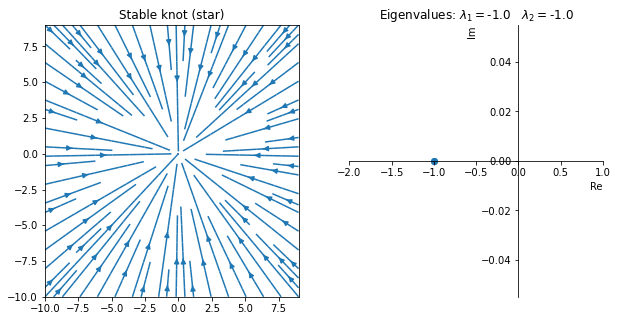

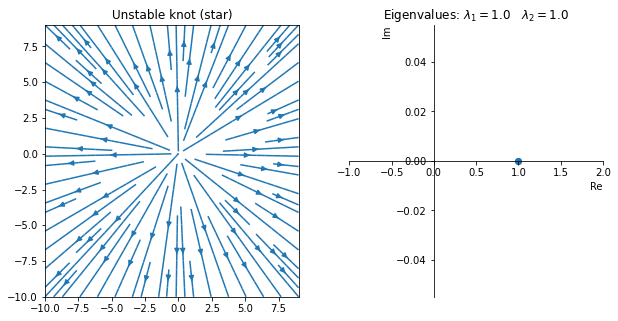

In [11]:
plot_matrix(A=[[-1, 0],
               [0 ,-1]], title="Stable knot (star)")

plot_matrix(A=[[1, 0],
               [0 ,1]], title="Unstable knot (star)")

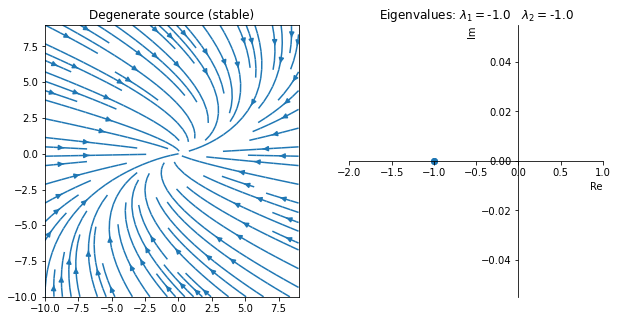

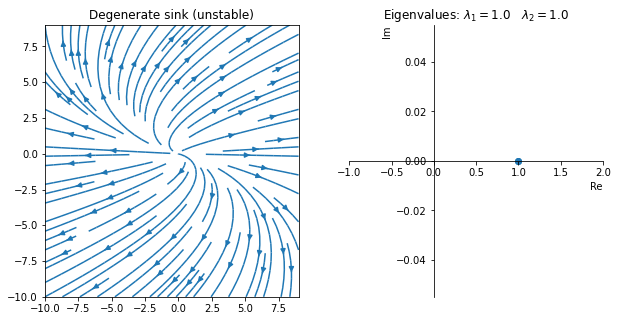

In [12]:
plot_matrix(A=[[-1, 1],
               [0 ,-1]], title="Degenerate source (stable)")

plot_matrix(A=[[1, 1],
               [0 ,1]], title="Degenerate sink (unstable)")

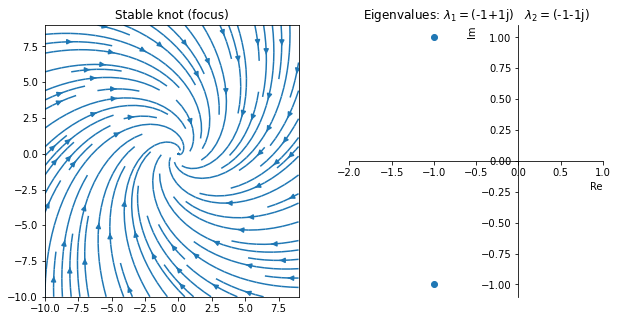

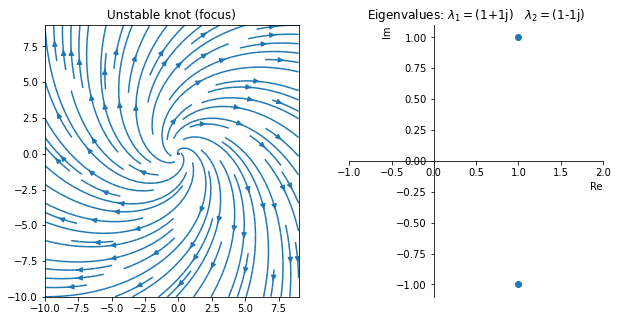

In [13]:
plot_matrix(A=[[-1, 1],
               [-1,-1]], title="Stable knot (focus)")

plot_matrix(A=[[1, 1],
               [-1,1]], title="Unstable knot (focus)")

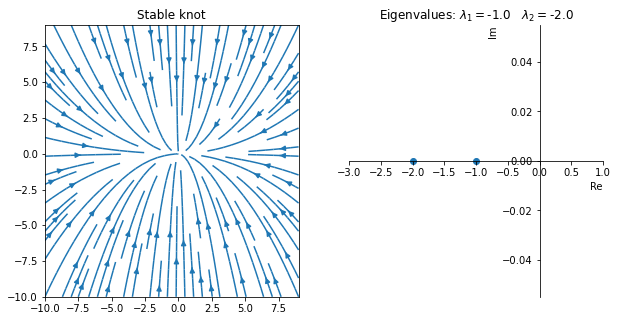

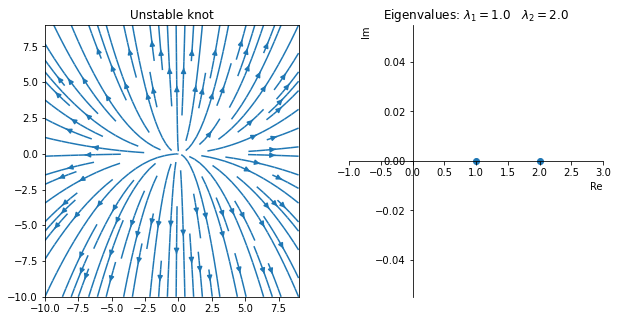

In [14]:
plot_matrix(A=[[-1, 0],
               [0, -2]], title="Stable knot")

plot_matrix(A=[[1, 0],
               [0, 2]], title="Unstable knot")

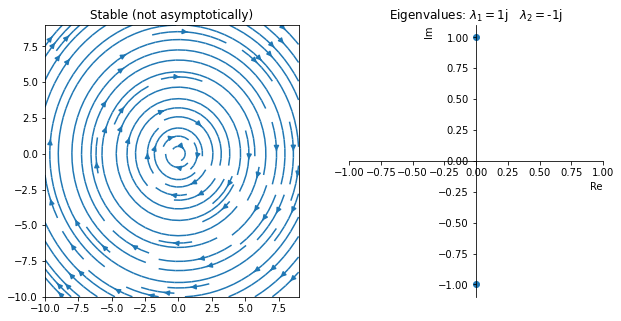

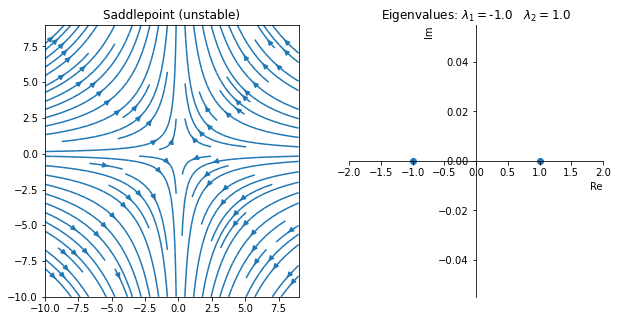

In [15]:
plot_matrix(A=[[0,  1],
               [-1, 0]], title="Stable (not asymptotically)")

plot_matrix(A=[[-1, 0],
               [0, 1]], title="Saddlepoint (unstable)")

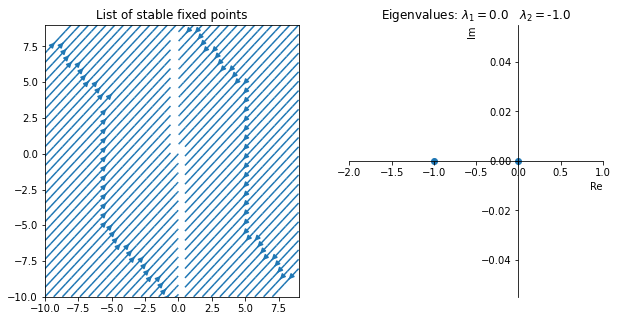

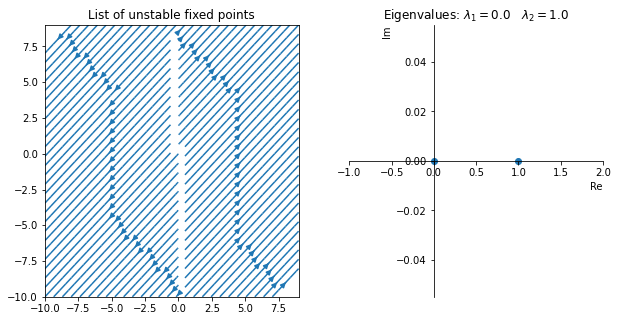

In [16]:
plot_matrix(A=[[-1,0],
               [-1,0]], title="List of stable fixed points")

plot_matrix(A=[[1, 0],
               [1, 0]], title="List of unstable fixed points")